# 1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/Users/zhouhanqi/Downloads/ipaper/0404-04-统计作业/diabete.csv')
df.dropna(inplace=True)
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

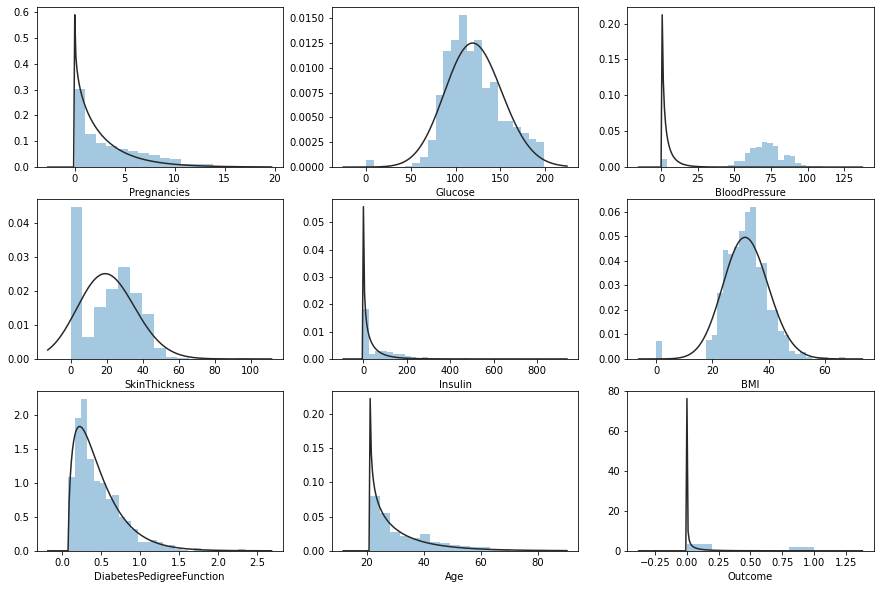

In [4]:
fig,ax = plt.subplots(3,3,figsize=(15, 10))
k = 0
for i in range(3):
    for j in range(3):
        sns.distplot(df.iloc[:,k], kde=False, fit=stats.gamma, ax=ax[i,j])
        k += 1

In [5]:
# Glucose BloodPressure SkinThickness Insulin BMI
df.loc[df['Glucose']==0.0,'Glucose'] = df['Glucose'].mean()
df.loc[df['BloodPressure']==0.0,'BloodPressure'] = df['BloodPressure'].mean()
df.loc[df['SkinThickness']==0.0,'SkinThickness'] = df['SkinThickness'].mean()
df.loc[df['Insulin']==0.0,'Insulin'] = df['Insulin'].mean()
df.loc[df['BMI']==0.0,'BMI'] = df['BMI'].mean()

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<AxesSubplot:>

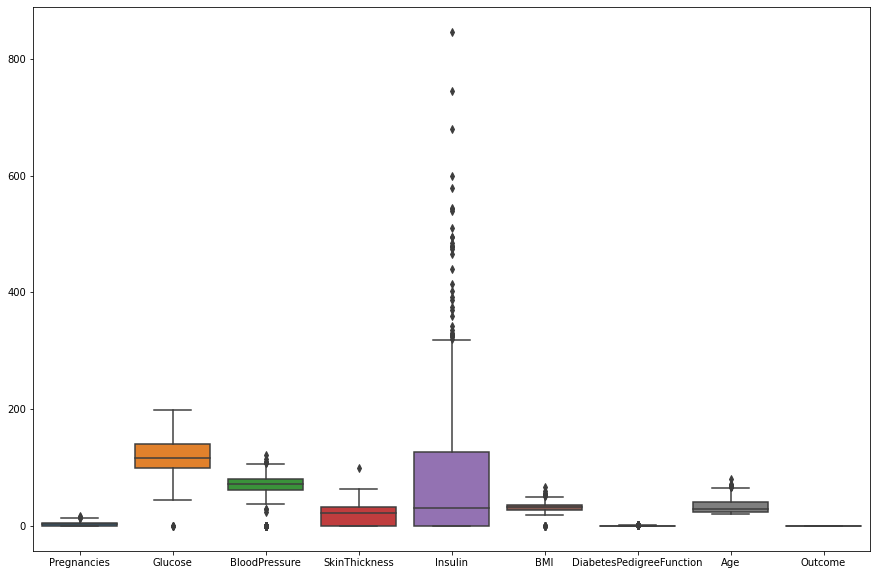

In [5]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df[df.columns.to_numpy().tolist()],ax=ax)

In [6]:
names = ['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for name in names:
    percentile25 = df[name].quantile(0.25)
    percentile75 = df[name].quantile(0.75)
    print(name+'_percentile25: %.1f,'%(percentile25)+name+'_percentile75: %.1f'%(percentile75))
    iqr = percentile75 - percentile25
    upper_BP = percentile75 + 1.5 * iqr
    lower_BP = percentile25 - 1.5 * iqr
    print(name+'_upper_BP: %.1f,'%(upper_BP)+name+'_lower_BP: %.1f'%(lower_BP))
    df[name] = np.where(df[name]>upper_BP, upper_BP, df[name])
    df[name] = np.where(df[name]<lower_BP, lower_BP, df[name])

BloodPressure_percentile25: 62.0,BloodPressure_percentile75: 80.0
BloodPressure_upper_BP: 107.0,BloodPressure_lower_BP: 35.0
SkinThickness_percentile25: 0.0,SkinThickness_percentile75: 32.0
SkinThickness_upper_BP: 80.0,SkinThickness_lower_BP: -48.0
Insulin_percentile25: 0.0,Insulin_percentile75: 127.2
Insulin_upper_BP: 318.1,Insulin_lower_BP: -190.9
BMI_percentile25: 27.3,BMI_percentile75: 36.6
BMI_upper_BP: 50.6,BMI_lower_BP: 13.3
DiabetesPedigreeFunction_percentile25: 0.2,DiabetesPedigreeFunction_percentile75: 0.6
DiabetesPedigreeFunction_upper_BP: 1.2,DiabetesPedigreeFunction_lower_BP: -0.3
Age_percentile25: 24.0,Age_percentile75: 41.0
Age_upper_BP: 66.5,Age_lower_BP: -1.5


<AxesSubplot:>

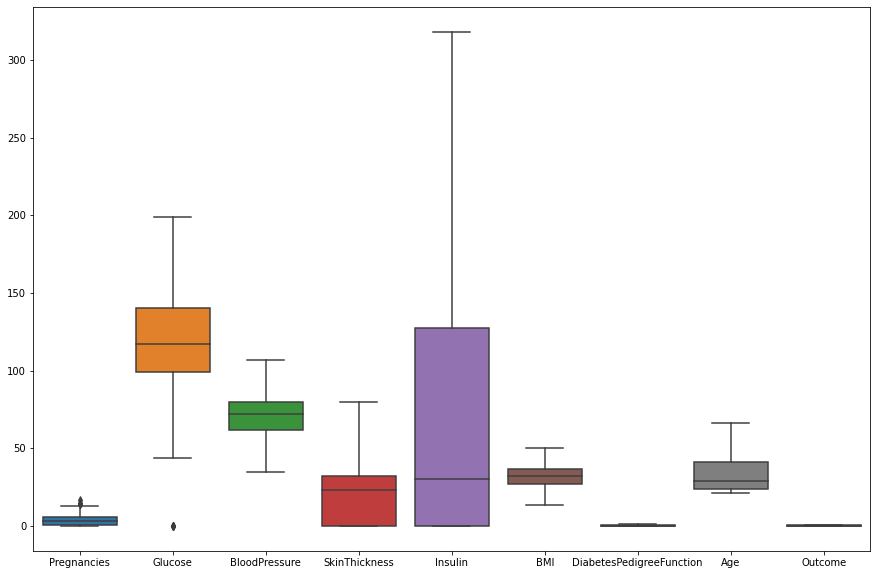

In [7]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df[df.columns.to_numpy().tolist()],ax=ax)

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.226161      26.475416  103.895703   
std       3.369578   30.436016      11.716722       9.112201   46.779152   
min       0.000000   44.000000      40.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     104.000000      49.195312  198.425781   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.388956                  0.458914   33.199870    0.348958  
std      6.667633                  0.285596   11.628404    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     50.250000                  1.200000   66.500000    1.000000

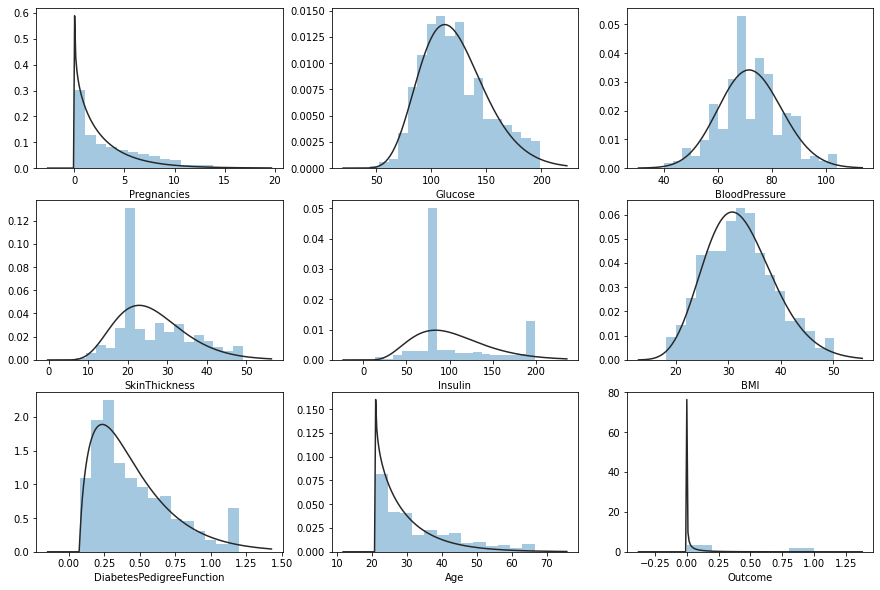

In [7]:
fig,ax = plt.subplots(3,3,figsize=(15, 10))
k = 0
for i in range(3):
    for j in range(3):
        sns.distplot(df.iloc[:,k], kde=False, fit=stats.gamma, ax=ax[i,j])
        k += 1

# 2

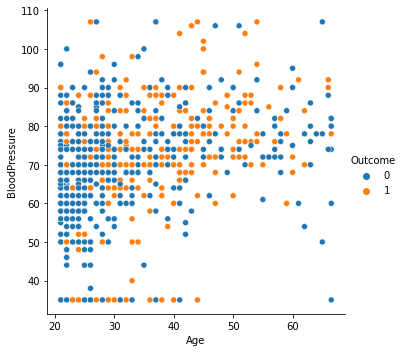

In [8]:
# Visualization
sns.relplot(x="Age",y="BloodPressure",hue="Outcome", data=df, ax=ax)

In [9]:
# Research question: What are the effects of age and bloodpressure on diabetes?
# Hypothesis: senior women who have high bloodpressure correlate with diabetes 
# and young women who do not have high bloodpressure correlate without diabetes.

# BloodPressure
def t_2samp(list_c1,list_c2,L):
    lst1,lst2=list_c1.copy(),list_c2.copy()
    n1,n2=len(lst1),len(lst2)
    
    alpha = 1-L
    sig_homovar=stats.levene(lst1,lst2)[1]
    var1,var2=np.var(lst1)*n1/(n1-1),np.var(lst2)*n2/(n2-1)
    var12=((n1-1)*var1+(n2-1)*var2)/(n1+n2-2)
    std12=var12**0.5
    
    t = stats.t.ppf(1-alpha/2, n1+n2-2)
    d1 = (np.mean(lst1)-np.mean(lst2))-t*(var12*(1/n1+1/n2))**0.5
    d2 = (np.mean(lst1)-np.mean(lst2))+t*(var12*(1/n1+1/n2))**0.5
    
    t_homo=(np.mean(lst1)-np.mean(lst2))/(var12*(1/n1+1/n2))**0.5
    df_homo=n1+n2-2
    sig_homo=2*stats.t.sf(abs(t_homo),df_homo)
    t_nothomo=(np.mean(lst1)-np.mean(lst2))/(var1/n1+var2/n2)**0.5
    df_nothomo=(var1/n1+var2/n2)**2/((var1/n1)**2/n1+(var2/n2)**2/n2)
    sig_nothomo=2*stats.t.sf(abs(t_nothomo),df_nothomo)

    df_res=pd.DataFrame(index=['equal variance','unequal variance'],columns=['significance','standard deviation','confidence interval','t value','freedom','Sig.'])
    df_res['significance']=[sig_homovar,'-']
    df_res['standard deviation']=[std12,'-']
    df_res['confidence interval']=[(round(d1,6),round(d2,6)),'-']
    df_res['t value']=[t_homo,t_nothomo]
    df_res['freedom']=[df_homo,df_nothomo]
    df_res['Sig.']=[sig_homo,sig_nothomo]
    return df_res

group1=df.loc[df['Outcome']==1, 'BloodPressure']
group2=df.loc[df['Outcome']==0, 'BloodPressure']
print(len(group1),len(group2))

t_2samp(group1.to_numpy().tolist(),group2.to_numpy().tolist(),0.95)

268 500


significance standard deviation   confidence interval  \
equal variance       0.298216          14.115023  (1.274891, 5.470303)   
unequal variance            -                  -                     -   

                   t value    freedom      Sig.  
equal variance    3.156128  766.00000  0.001661  
unequal variance  3.053747  498.93711  0.002381

<AxesSubplot:xlabel='BloodPressure'>

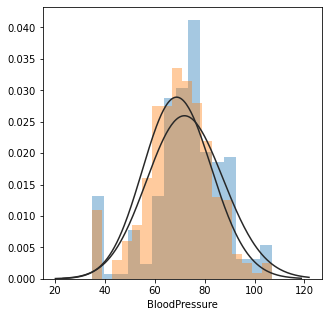

In [10]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.distplot(group1, kde=False, fit=stats.gamma, ax=ax)
sns.distplot(group2, kde=False, fit=stats.gamma, ax=ax)

In [11]:
# Age
group1=df.loc[df['Outcome']==1, 'Age']
group2=df.loc[df['Outcome']==0, 'Age']
t_2samp(group1.to_numpy().tolist(),group2.to_numpy().tolist(),0.95)

significance standard deviation   confidence interval  \
equal variance       0.112956          11.288086  (4.239658, 7.594819)   
unequal variance            -                  -                     -   

                   t value     freedom          Sig.  
equal variance    6.924215  766.000000  9.284605e-12  
unequal variance  7.028028  571.600267  5.988180e-12

<AxesSubplot:xlabel='Age'>

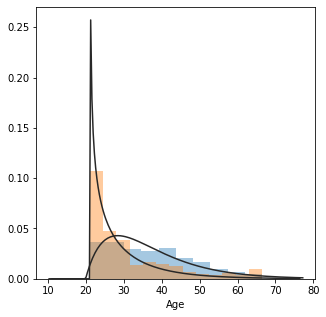

In [12]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.distplot(group1, kde=False, fit=stats.gamma, ax=ax)
sns.distplot(group2, kde=False, fit=stats.gamma, ax=ax)

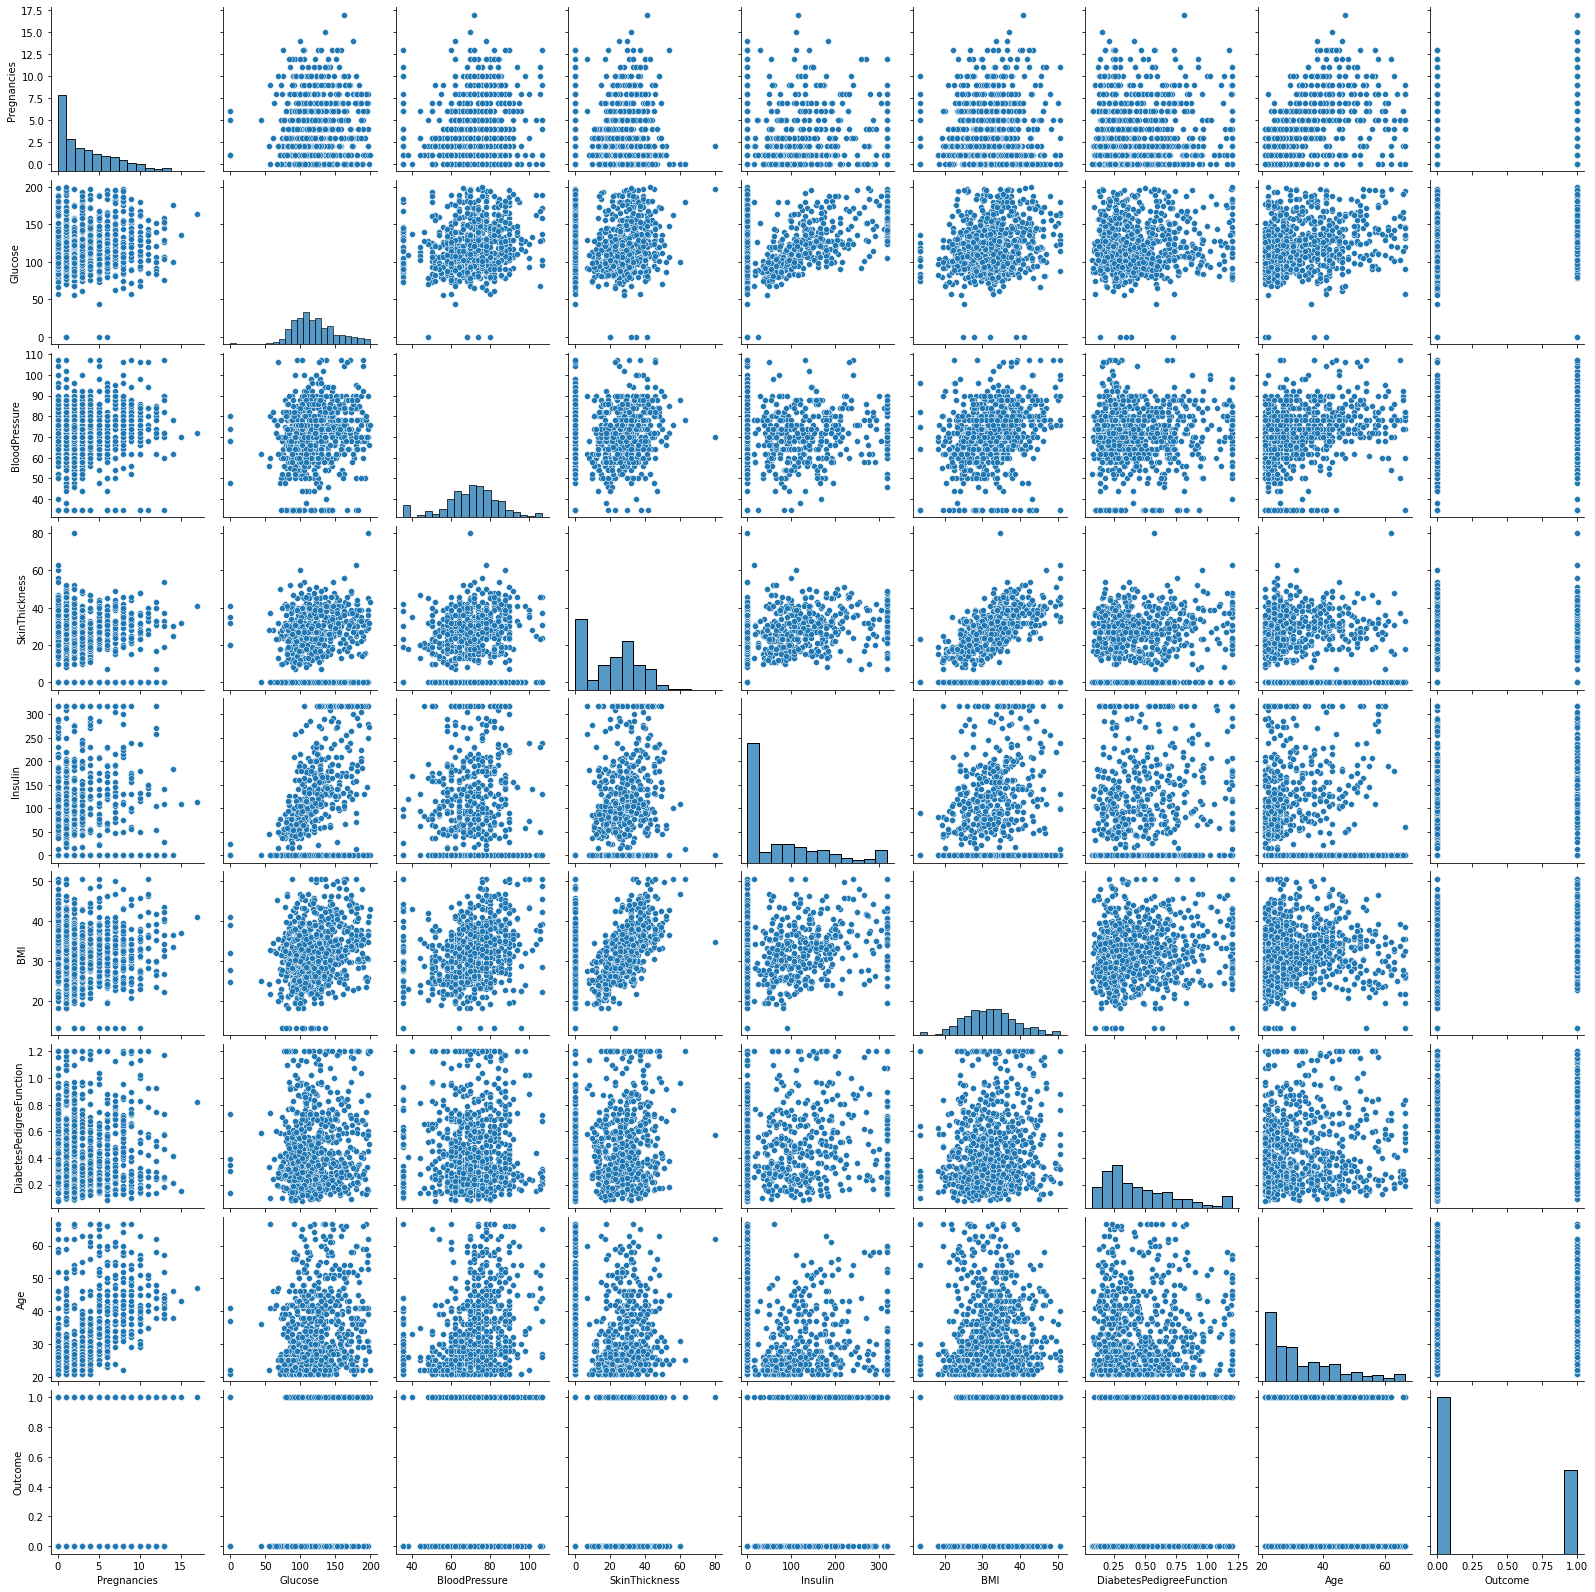

In [13]:
sns.pairplot(df)

<AxesSubplot:>

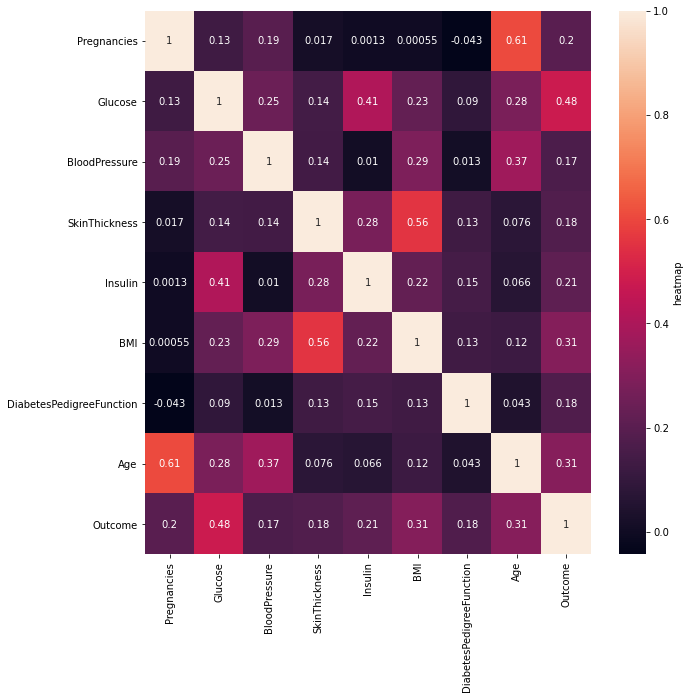

In [17]:
corr = df.corr(method='spearman')
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,annot=True,cbar_kws={'label':'heatmap'},ax=ax)
# Pregnancies have large ralation with Age, and SkinThickness have also large relation with BMI

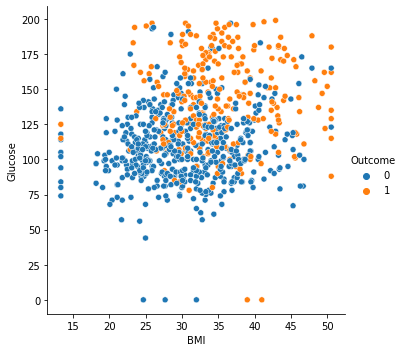

In [14]:
# Research question: What are the effects of BMI and glucose on diabetes?
# Hypothesis: women who have high glucose numbers and high BMI correlate with diabetes 
# and women who have low glucose numbers and low BMI  correlate without diabetes.

sns.relplot(x="BMI",y="Glucose",hue="Outcome", data=df, ax=ax)

In [15]:
#Glucose

group1=df.loc[df['Outcome']==1, 'Glucose']
group2=df.loc[df['Outcome']==0, 'Glucose']
print(len(group1),len(group2))

t_2samp(group1.to_numpy().tolist(),group2.to_numpy().tolist(),0.95)

268 500


significance standard deviation    confidence interval  \
equal variance       0.000006          28.297539  (27.07202, 35.482905)   
unequal variance            -                  -                      -   

                    t value     freedom          Sig.  
equal variance    14.600060  766.000000  8.935432e-43  
unequal variance  13.751537  463.007569  2.528740e-36

<AxesSubplot:xlabel='Glucose'>

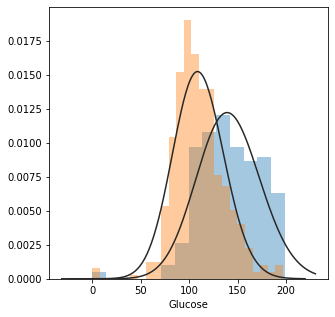

In [16]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.distplot(group1, kde=False, fit=stats.gamma, ax=ax)
sns.distplot(group2, kde=False, fit=stats.gamma, ax=ax)

In [17]:
#BMI

group1=df.loc[df['Outcome']==1, 'BMI']
group2=df.loc[df['Outcome']==0, 'BMI']
print(len(group1),len(group2))

t_2samp(group1.to_numpy().tolist(),group2.to_numpy().tolist(),0.95)

268 500


significance standard deviation   confidence interval  \
equal variance       0.052427           6.707271  (3.581295, 5.574899)   
unequal variance            -                  -                     -   

                   t value     freedom          Sig.  
equal variance    9.015938  766.000000  1.539591e-18  
unequal variance  9.188627  578.253163  7.081868e-19

<AxesSubplot:xlabel='BMI'>

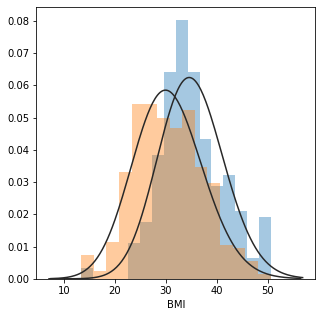

In [18]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.distplot(group1, kde=False, fit=stats.gamma, ax=ax)
sns.distplot(group2, kde=False, fit=stats.gamma, ax=ax)

# 3

In [20]:
tmp_df = df[['Glucose','BMI','Outcome']]
tmp_df.describe()

Glucose         BMI     Outcome
count  768.000000  768.000000  768.000000
mean   120.894531   32.125065    0.348958
std     31.972618    7.049584    0.476951
min      0.000000   13.350000    0.000000
25%     99.000000   27.300000    0.000000
50%    117.000000   32.000000    0.000000
75%    140.250000   36.600000    1.000000
max    199.000000   50.550000    1.000000

In [21]:
tmp_df.head(20)

Glucose    BMI  Outcome
0       148  33.60        1
1        85  26.60        0
2       183  23.30        1
3        89  28.10        0
4       137  43.10        1
5       116  25.60        0
6        78  31.00        1
7       115  35.30        0
8       197  30.50        1
9       125  13.35        1
10      110  37.60        0
11      168  38.00        1
12      139  27.10        0
13      189  30.10        1
14      166  25.80        1
15      100  30.00        1
16      118  45.80        1
17      107  29.60        1
18      103  43.30        0
19      115  34.60        1

In [22]:
new_df = tmp_df.copy()
new_df.loc[tmp_df['Glucose']<140.0,'Glucose'] = 'low'
new_df.loc[tmp_df['Glucose']>=140.0,'Glucose'] = 'high'

#new_df.loc[tmp_df['BMI']<tmp_df['BMI'].quantile(0.33),'BMI'] = 'thin'
#new_df.loc[(tmp_df['BMI']>=tmp_df['BMI'].quantile(0.33)) & (tmp_df['BMI']<tmp_df['BMI'].quantile(0.67)),'BMI'] = 'normal'
#new_df.loc[tmp_df['BMI']>=tmp_df['BMI'].quantile(0.67),'BMI'] = 'fat'

new_df.loc[tmp_df['BMI']<18.5,'BMI'] = 'thin'
new_df.loc[(tmp_df['BMI']>=18.5) & (tmp_df['BMI']<25),'BMI'] = 'normal'
new_df.loc[tmp_df['BMI']>=25.0,'BMI'] = 'fat'

new_df.head(20)

Glucose     BMI  Outcome
0     high     fat        1
1      low     fat        0
2     high  normal        1
3      low     fat        0
4      low     fat        1
5      low     fat        0
6      low     fat        1
7      low     fat        0
8     high     fat        1
9      low    thin        1
10     low     fat        0
11    high     fat        1
12     low     fat        0
13    high     fat        1
14    high     fat        1
15     low     fat        1
16     low     fat        1
17     low     fat        1
18     low     fat        0
19     low     fat        1

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# multiple linear regression and ANOVA


model = ols('Outcome ~ C(Glucose) + C(BMI) + C(Glucose):C(BMI)', data=new_df).fit()
sm.stats.anova_lm(model)


df      sum_sq    mean_sq           F        PR(>F)
C(Glucose)           1.0   29.970841  29.970841  164.789659  2.718452e-34
C(BMI)               2.0    5.737869   2.868934   15.774356  1.937000e-07
C(Glucose):C(BMI)    2.0    0.076620   0.038310    0.210642  8.101115e-01
Residual           763.0  138.769338   0.181873         NaN           NaN

In [24]:
# Do post-hoc bonferroni Glucose ~ Outcome
pair_t = model.t_test_pairwise('C(Glucose)')
pair_t.result_frame

coef   std err          t         P>|t|  Conf. Int. Low  \
low-high -0.421505  0.036999 -11.392291  7.068478e-28       -0.494138   

          Conf. Int. Upp.     pvalue-hs  reject-hs  
low-high        -0.348873  7.068478e-28       True

In [25]:
# Do post-hoc bonferroni BMI ~ Outcome
pair_t = model.t_test_pairwise('C(BMI)')
pair_t.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
normal-fat  -0.244379  0.132332 -1.846714  0.065176       -0.504157   
thin-fat    -0.072043  0.055937 -1.287920  0.198164       -0.181853   
thin-normal  0.172336  0.143669  1.199538  0.230691       -0.109697   

             Conf. Int. Upp.  pvalue-hs  reject-hs  
normal-fat          0.015399    0.18306      False  
thin-fat            0.037767    0.35706      False  
thin-normal         0.454370    0.35706      False

In [26]:
print(model.params)

Intercept                             0.698925
C(Glucose)[T.low]                    -0.421505
C(BMI)[T.normal]                     -0.244379
C(BMI)[T.thin]                       -0.072043
C(Glucose)[T.low]:C(BMI)[T.normal]   -0.011062
C(Glucose)[T.low]:C(BMI)[T.thin]     -0.072043
dtype: float64


In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     49.09
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           9.08e-37
Time:                        15:28:32   Log-Likelihood:                -432.73
No. Observations:                 768   AIC:                             875.5
Df Residuals:                     763   BIC:                             898.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# Power analysis on BMI group

In [28]:
from statsmodels.stats.power import TTestIndPower
effect_size = 0.8
alpha = 0.05
power = 0.8
# Run power analysis for sample t-test
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size:', result)

Sample Size: 25.52457250047935


   Effect Size     Power
0          0.1  0.063867
1          0.2  0.106581
2          0.3  0.180025
3          0.4  0.283399
4          0.5  0.410100
5          0.6  0.547312
6          0.7  0.679094
7          0.8  0.791451
8          0.9  0.876515


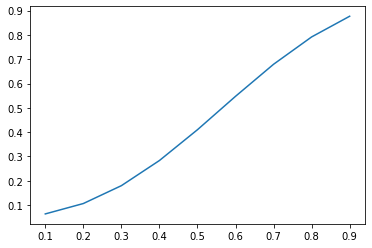

In [29]:
alpha = 0.05
sample_size = 25
power_analysis = TTestIndPower()
power_a1 = []
for effect_size in np.arange(0.1, 1, 0.1):
    power_a1.append(power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha))
analysis1 = pd.DataFrame({
    'Effect Size': np.arange(0.1, 1, 0.1),
    'Power': power_a1
})
print(analysis1)
plt.plot(analysis1['Effect Size'], analysis1['Power'])
# relation between power and effect size

In [30]:
from itertools import combinations
from statsmodels.stats.power import TTestIndPower
bp_value_count = pd.DataFrame(new_df["BMI"].value_counts()).reset_index()
bp_combinations1 = pd.DataFrame(list(combinations(list(bp_value_count["index"]), 2)), columns=["bmi_type1", "bmi_type2"])
bp_combinations2 = pd.merge(bp_combinations1, bp_value_count, left_on="bmi_type1", right_on="index")
bp_combinations = pd.merge(bp_combinations2, bp_value_count, left_on="bmi_type2", right_on="index")
bp_combinations.drop(["index_x", "index_y"], axis=1, inplace=True)

effect_size = 0.8
alpha = 0.05

def power_analysis_func(row):
    ratio = (row["BMI_y"] / row["BMI_x"])
    analysis = TTestIndPower()
    return analysis.solve_power(effect_size=effect_size, power=None, nobs1=row["BMI_x"], ratio=1.0, alpha=alpha)

bp_combinations["power"] = bp_combinations.apply(power_analysis_func, axis=1)
bp_combinations

bmi_type1 bmi_type2  BMI_x  BMI_y     power
0       fat    normal    651    102  1.000000
1       fat      thin    651     15  1.000000
2    normal      thin    102     15  0.999903

    Sample Size     Power
0             5  0.200739
1            10  0.395069
2            15  0.561785
3            20  0.693404
4            25  0.791451
5            30  0.861423
6            35  0.909723
7            40  0.942182
8            45  0.963517
9            50  0.977279
10           55  0.986014
11           60  0.991481
12           65  0.994860
13           70  0.996925
14           75  0.998175
15           80  0.998925
16           85  0.999371
17           90  0.999634
18           95  0.999788
19          100  0.999878
20          105  0.999930
21          110  1.000000
22          115  1.000000
23          120  1.000000
24          125  1.000000
25          130  1.000000
26          135  1.000000
27          140  1.000000
28          145  1.000000


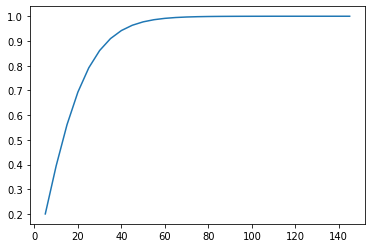

In [31]:
alpha = 0.05
effect_size = 0.8
power_analysis = TTestIndPower()
power_a2 = []
for sample_size in np.arange(5, 150, 5):
    power_a2.append(power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha))
analysis2 = pd.DataFrame({
    'Sample Size': np.arange(5, 150, 5),
    'Power': power_a2
})
print(analysis2)
plt.plot(analysis2['Sample Size'], analysis2['Power'])
# relation between power and sample size

   Alpha     Power
0    0.1  0.873557
1    0.2  0.936071
2    0.3  0.962193
3    0.4  0.976064
4    0.5  0.984346
5    0.6  0.989680
6    0.7  0.993335
7    0.8  0.996007
8    0.9  1.000000


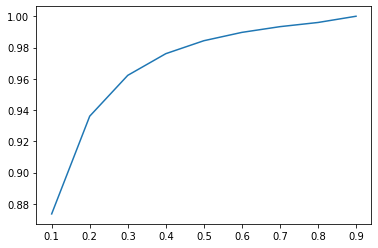

In [32]:
effect_size = 0.8
sample_size = 25
power_analysis = TTestIndPower()
power_a3 = []
for alpha in np.arange(0.1, 1, 0.1):
    power_a3.append(power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha))
analysis3 = pd.DataFrame({
    'Alpha': np.arange(0.1, 1, 0.1),
    'Power': power_a3
})
print(analysis3)
plt.plot(analysis3['Alpha'], analysis3['Power'])
# relation between power and alpha

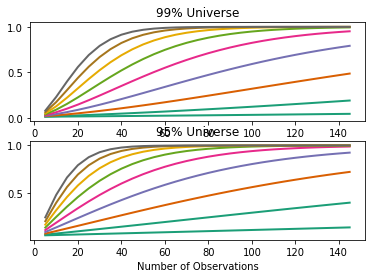

In [33]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
                                nobs = np.arange(5, 150, 5),
                                effect_size = np.arange(0.1, 1, 0.1),
                                alpha = 0.01,
                                ax = ax, title = "99% Universe")
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
                                nobs = np.arange(5, 150, 5),
                                effect_size = np.arange(0.1, 1, 0.1),
                                alpha = 0.05,
                                ax = ax, title = "95% Universe")
ax.get_legend().remove()

 Power analysis on bmi

In [34]:
from itertools import combinations
from statsmodels.stats.power import TTestIndPower
bp_value_count = pd.DataFrame(new_df["BMI"].value_counts()).reset_index()
bp_combinations1 = pd.DataFrame(list(combinations(list(bp_value_count["index"]), 2)), columns=["bmi_type1", "bmi_type2"])
bp_combinations2 = pd.merge(bp_combinations1, bp_value_count, left_on="bmi_type1", right_on="index")
bp_combinations = pd.merge(bp_combinations2, bp_value_count, left_on="bmi_type2", right_on="index")
bp_combinations.drop(["index_x", "index_y"], axis=1, inplace=True)

effect_size = 0.8
alpha = 0.05

def power_analysis_func(row):
    ratio = (row["BMI_y"] / row["BMI_x"])
    analysis = TTestIndPower()
    return analysis.solve_power(effect_size=effect_size, power=None, nobs1=row["BMI_x"], ratio=1.0, alpha=alpha)

bp_combinations["power"] = bp_combinations.apply(power_analysis_func, axis=1)
bp_combinations

bmi_type1 bmi_type2  BMI_x  BMI_y     power
0       fat    normal    651    102  1.000000
1       fat      thin    651     15  1.000000
2    normal      thin    102     15  0.999903

# Power analysis on glucose group

In [35]:
from itertools import combinations
bp_value_count = pd.DataFrame(new_df["Glucose"].value_counts()).reset_index()
bp_combinations1 = pd.DataFrame(list(combinations(list(bp_value_count["index"]), 2)), columns=["glu_type1", "glu_type2"])
bp_combinations2 = pd.merge(bp_combinations1, bp_value_count, left_on="glu_type1", right_on="index")
bp_combinations = pd.merge(bp_combinations2, bp_value_count, left_on="glu_type2", right_on="index")
bp_combinations.drop(["index_x", "index_y"], axis=1, inplace=True)

effect_size = 0.8
alpha = 0.05

def power_analysis_func(row):
    ratio = (row["Glucose_y"] / row["Glucose_x"])
    analysis = TTestIndPower()
    return analysis.solve_power(effect_size=effect_size, power=None, nobs1=row["Glucose_x"], ratio=1.0, alpha=alpha)

bp_combinations["power"] = bp_combinations.apply(power_analysis_func, axis=1)
bp_combinations

glu_type1 glu_type2  Glucose_x  Glucose_y  power
0       low      high        571        197    1.0